<a href="https://colab.research.google.com/github/prasanthjose/AI/blob/master/Session3Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


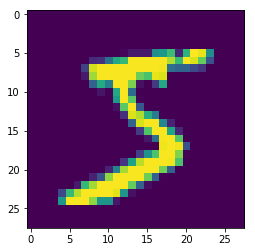

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
#Resize the training and test data to 28X28 

In [0]:
#Set the data to float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Dvide the pixel values with 255 so that they are less than 1; We don't have to deal with very large values
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# Doing convolution with 32 3x3 kernels. activation function is relu. input size is 28X28
model.add(Convolution2D(10, 1, activation='relu'))
# Doing a 1x1 convolution with 10 kernels to produce 10 channels
model.add(Convolution2D(10, 26))
# Don't know what it is.
model.add(Flatten())
#Flatten the arrays
model.add(Activation('softmax'))
# The output function of the final layer

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 37s 612us/step - loss: 0.2217 - acc: 0.9351
Epoch 2/10
60000/60000 [==============================] - 36s 596us/step - loss: 0.0768 - acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 36s 596us/step - loss: 0.0555 - acc: 0.9827
Epoch 4/10
60000/60000 [==============================] - 36s 600us/step - loss: 0.0431 - acc: 0.9861
Epoch 5/10
60000/60000 [==============================] - 36s 597us/step - loss: 0.0341 - acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 36s 597us/step - loss: 0.0274 - acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 36s 597us/step - loss: 0.0214 - acc: 0.9934
Epoch 8/10
60000/60000 [==============================] - 36s 600us/step - loss: 0.0172 - acc: 0.9946
Epoch 9/10
60000/60000 [==============================] - 36s 603us/step - loss: 0.0133 - acc: 0.9957
Epoch 10/10
60000/60000 [==============================] - 36s 598us/step -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
#Evaluate our model with the test data

In [16]:
print(score)

[0.07678227404982826, 0.9808]


In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[9.65578600e-18 2.70679160e-18 2.28876518e-11 2.66631332e-07
  1.90397201e-14 4.59918307e-15 1.58269685e-28 9.99999762e-01
  1.58886335e-10 5.37655476e-09]
 [7.94753933e-12 4.87478981e-13 1.00000000e+00 9.90512034e-13
  1.50324640e-23 3.71868044e-17 1.42331806e-12 5.91359197e-28
  8.94880780e-16 2.75274969e-22]
 [4.92388441e-09 9.99844909e-01 1.38743087e-06 1.23948452e-09
  1.45760278e-04 1.17919532e-08 8.22589374e-09 2.52469789e-07
  7.68330210e-06 1.42642509e-10]
 [1.00000000e+00 2.24745118e-20 3.23573945e-11 1.38404694e-16
  3.40622322e-17 2.06606282e-12 4.57516577e-12 7.06192917e-14
  5.74621037e-12 2.22274185e-13]
 [7.77866649e-13 1.22125334e-17 6.04017400e-12 2.84361862e-13
  9.99999881e-01 2.31000390e-16 5.44234762e-14 8.28418278e-10
  1.32850841e-09 8.33171399e-08]
 [6.97745542e-11 9.99908447e-01 4.89309748e-08 2.38152997e-10
  1.32885962e-05 2.06726108e-12 3.57643342e-12 7.51302505e-05
  3.15085367e-06 1.48758589e-10]
 [2.44067637e-21 2.67181134e-12 1.96261618e-10 3.37326114e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

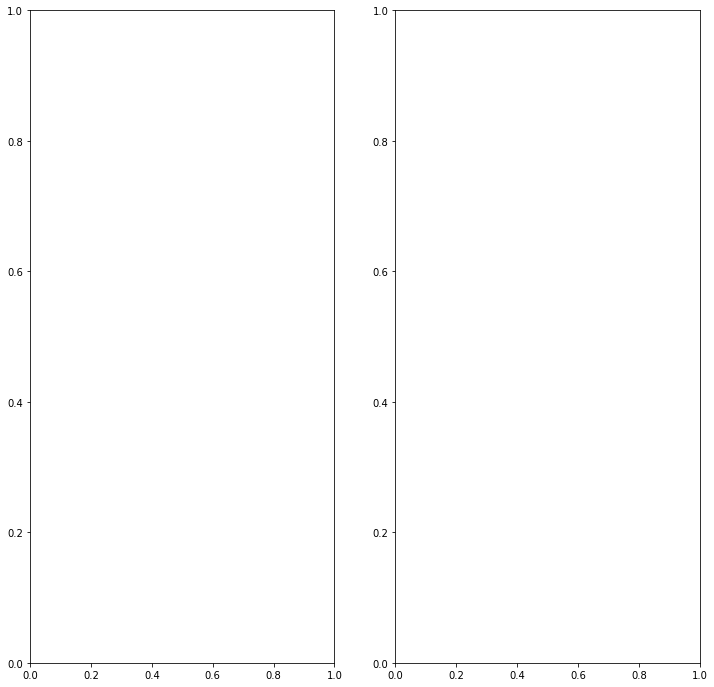

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

In [0]:
#New model



from keras.layers import Activation
model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 7))
model.add(Convolution2D(10, 7))
model.add(Convolution2D(10, 7))
model.add(Convolution2D(10, 7))
model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))